# **Data and Analysis Plan: World Series Predictions**

- Justin Radist
- Suneet Pathangay
- Zhenzhen Liu
- Elijah Sandler

## Project Goal:

Our project aims to explore the relationship between various MLB team and individual player statistics and the performance of teams in the playoffs and World Series. We have chosen to focus on ... for the last ... years. Specifically, we ask:
- 
- 

We are using https://www.baseball-reference.com/ for our main data source, which we will webscrape from. We are not using any API.

We have chosen to focus on the results for the top 100 men & women for the Boston Marathon for the last twenty-two years. Specifically, we ask:
- What are the optimal weather conditions for peak performance/fastest speed?
- Does the weather impact men differently than women?

## Pipeline Overview:

For scraping the Baseball Reference website:
- get_player_url(player) and get_team_url(team)
  - builds the URLs needed to access a certain player's or team's statistics page.
- then, get_player_df(), get_team_batting_df(), and get_team_pitching_df()
  - builds dataframes of a player's common careers stats table, a team's common batting stats by roster member for a single season, and a team's common pitching stats by pitching staff member for a single season, respectively.
 
These functions utilize other functions we've already written that perform tasks such as getting BeautifulSoup objects a certain player's or team's page on Baseball Reference and creating dictionaries from the stat tables on these pages.

### Pipeline:

#### 1. Building URLs and Webscraping

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from collections import defaultdict

In [2]:
def build_player_url(player):
    """ Constructs the URL of any MLB player's Baseball Reference stat page
    
    Args:
        player (str): a baseball player's full name
    
    Returns:
        url (str): the URL that can be used to retrieve the given player's
        stats from BaseballReference.com
    """
    first_init = player[0]
    first_two_letters = player[0:2]
    player_name_list = player.split(' ')
    # get last name except for last letter. Gets position 1 instead of -1 in case of a Jr./Sr. or II/III
    last_name = player_name_list[1][:-1]
    
    url = f"https://www.baseball-reference.com/players/{first_init}/{last_name}{first_two_letters}01.shtml"
    
    return url

In [3]:
def build_team_url(team, year):
    """ Constructs the URL of any MLB team's Baseball Reference stat page for a single season
    
    Args:
        team (str): 3-letter abbreviation of one of the 30 current MLB teams in existence
        year (int): the year/season to get team data for
    
    Returns:
        url (str): the URL that can be used to retrieve the given team's
        stats for the given year from BaseballReference.com
    """
    url = f"https://www.baseball-reference.com/teams/{team}/{str(year)}.shtml"
    return url

In [4]:
player = 'carlos correa'
team = 'NYM'
season = '2022'
player_url = build_player_url(player)
team_url = build_team_url(team, season)

In [5]:
def get_player_soup(url):
    """ gets a BeautifulSoup object of a MLB player's BaseballReference.com
        page by webscraping the page's HTML code
    
    Args:
        url (str): the URL that can be used to retrieve the given player's
        stats from BaseballReference.com
    
    Returns:
        soup (BeautifulSoup): a beautiful soup object of the given MLB
        player's BaseballReference.com page
    """
    html = requests.get(url).text
    soup = BeautifulSoup(html)
    
    return soup

In [6]:
def get_soup(url):
    """ gets a BeautifulSoup object of a MLB player's or team's BaseballReference.com
        page by webscraping the page's HTML code
    
    Args:
        url (str): the URL that can be used to retrieve the given player's or team's
        stats from BaseballReference.com
    
    Returns:
        soup (BeautifulSoup): a beautiful soup object of the given MLB
        player's or team's BaseballReference.com page
    """
    html = requests.get(url).text
    soup = BeautifulSoup(html)
    
    return soup

In [7]:
player_soup = get_player_soup(player_url)
team_soup = get_soup(team_url)

#### 2. Cleaning Data and Building Dataframes

In [8]:
dict_team_batting = defaultdict(lambda: dict())
def get_batting_df(team_code, dict_team_batting=dict_team_batting, year=2023):
    """ gets the batting table for a given team. if table is not stored, adds it to dictionary """
    
    if team_code in dict_team_batting.keys():
        return dict_team_batting[year][team_code]
    
    else:
        url = f"https://www.baseball-reference.com/teams/{team_code}/{str(year)}.shtml"
        df_batting = pd.read_html(url)[0]
        
        df_filtered = pd.DataFrame()
        for idx in df_batting.index:
            try:
                int(df_batting.loc[idx, 'Rk'])
                df_filtered = pd.concat([df_filtered, df_batting.loc[idx, :]], axis=1)
            except(ValueError):
                pass
        
        
        dict_team_batting[year][team_code] = df_filtered.T
        
    return dict_team_batting[year][team_code]

In [9]:
get_batting_df('NYY')

,Rk,Pos,Name,Age,G,PA,AB,R,H,2B,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
0,1,C,Kyle Higashioka,33,92,260,242,24,57,13,...,.274,.413,.687,85,100,5,0,1,3,0
1,2,1B,Anthony Rizzo*,33,99,421,373,45,91,14,...,.328,.378,.706,94,141,10,12,0,1,1
2,3,2B,Gleyber Torres,26,158,672,596,90,163,28,...,.347,.453,.800,118,270,19,3,0,6,0
3,4,SS,Anthony Volpe,22,159,601,541,62,113,23,...,.283,.383,.666,81,207,10,5,1,2,0
4,5,3B,DJ LeMahieu,34,136,562,497,55,121,22,...,.327,.390,.718,96,194,14,3,0,2,2
5,6,LF,Oswaldo Cabrera#,24,115,330,298,35,63,11,...,.275,.299,.574,58,89,6,2,3,2,1
6,7,CF,Harrison Bader,29,84,310,288,40,69,11,...,.278,.365,.643,75,105,6,3,1,4,0
7,8,RF,Aaron Judge,31,106,458,367,79,98,16,...,.406,.613,1.019,175,225,5,0,0,3,9
8,9,DH,Giancarlo Stanton,33,101,415,371,43,71,13,...,.275,.420,.695,87,156,11,2,0,1,3
10,10,UT,Isiah Kiner-Falefa,28,113,361,326,39,79,12,...,.306,.340,.646,78,111,12,3,1,3,0


In [10]:
dict_team_pitching = defaultdict(lambda: dict())
def get_pitching_df(team_code, dict_team_pitching=dict_team_pitching, year=2023):
    """ gets the pitching table for a given team. if table is not stored, adds it to dictionary """
    
    if team_code in dict_team_pitching[year].keys():
        return dict_team_pitching[year][team_code]
    
    else:
        url = f"https://www.baseball-reference.com/teams/{team_code}/{str(year)}.shtml"
        df_pitching = pd.read_html(url)[1]
        
        df_filtered = pd.DataFrame()
        for idx in df_pitching.index:
            try:
                int(df_pitching.loc[idx, 'Rk'])
                df_filtered = pd.concat([df_filtered, df_pitching.loc[idx, :]], axis=1)
            except(ValueError):
                pass
        
        
        dict_team_pitching[year][team_code] = df_filtered.T
        
    return dict_team_pitching[year][team_code]

In [11]:
get_pitching_df('BOS')

,Rk,Pos,Name,Age,W,L,W-L%,ERA,G,GS,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
0,1,SP,Brayan Bello,24,12,11,.522,4.24,28,28,...,1,668,107,4.54,1.338,9.5,1.4,2.6,7.6,2.93
1,2,SP,Kutter Crawford,27,6,8,.429,4.04,31,23,...,4,527,113,3.83,1.106,7.4,1.2,2.5,9.4,3.75
2,3,SP,Tanner Houck,27,6,10,.375,5.01,21,21,...,1,463,91,4.44,1.368,8.8,1.2,3.5,8.4,2.41
3,4,SP,Chris Sale*,34,6,5,.545,4.30,20,20,...,3,425,106,3.80,1.130,7.6,1.3,2.5,11.0,4.31
4,5,SP,James Paxton*,34,7,5,.583,4.50,19,19,...,5,411,101,4.68,1.313,8.7,1.7,3.1,9.5,3.06
6,6,CL,Kenley Jansen,35,3,6,.333,3.63,51,0,...,1,188,126,3.66,1.276,8.1,1.0,3.4,10.5,3.06
7,7,RP,Josh Winckowski,25,4,4,.500,2.88,60,1,...,2,367,158,3.91,1.423,9.5,1.0,3.3,8.8,2.65
8,8,RP,Chris Martin,37,4,1,.800,1.05,55,0,...,1,199,434,2.44,1.032,7.9,0.4,1.4,8.1,5.75
9,9,RP,Brennan Bernardino*,31,2,1,.667,3.20,55,6,...,3,216,143,3.41,1.303,8.5,0.7,3.2,10.3,3.22
10,10,RP,John Schreiber,29,2,1,.667,3.86,46,2,...,1,204,119,4.52,1.414,7.9,1.2,4.8,10.2,2.12


In [12]:
def get_player_dict(player_soup):
    """ creates a dictionary of all an baseball player's MLB stats
        by web scraping BaseballReference.com
    
    Args:
        player_soup (BeautifulSoup): a beautiful soup object of a MLB
        player's BaseballReference.com page
    
    Returns:
        player_dict (dict): a dictionary of all the given player's MLB
        stats, where the keys are the years played in the MLB
    """
    # build dictionary of player stats row by row (season by season) without knowing years they've played
    player_stats = player_soup.find_all(class_='row_summable', id='batting_standard')[0].find_all('tbody')[0].find_all(class_='full')
    player_dict = {}
    for item in player_stats:
        # list will add current year's stats to
        temp_list = []
        # get list of tags, where each tag is different stat for current year
        tds = item.find_all('td')
        # loop through the tags and add each tags' text (stat) to the temp list
        for td in tds:
            temp_list.append(td.text)
        # add current list of stats to the year they correspond to
        player_dict[item.find('th').text] = temp_list
    
    return player_dict

In [13]:
def get_team_dict(team_soup, stat_type):
    """ creates a dictionary of all an baseball player's MLB stats
        by web scraping BaseballReference.com
    
    Args:
        team_soup (BeautifulSoup): a beautiful soup object of a MLB
        team's BaseballReference.com page
        stat_type (str): specify if want a team's batting stats or pitching stats
    
    Returns:
        team_dict (dict): a dictionary of all the team's stats (either batting or pitching),
        where the keys are the players on the team's roster that season
    """
    pass

In [14]:
player_dict = get_player_dict(player_soup)
team_dict = get_team_dict(team_soup)

TypeError: get_team_dict() missing 1 required positional argument: 'stat_type'

In [15]:
# get player stat names (used for df col names for a player). [1:] gets rid of 'Year'
header = player_soup.find_all(class_='row_summable')[0].find_all(attrs={'aria-label': True})[1:]
stat_names = []
for item in header:
    stat_names.append(item.text)

# get team stat names
pass

In [16]:
def get_player_df(player_dict):
    """ creates a df of all a baseball player's MLB stats
    
    Args:
        player_soup (BeautifulSoup): a dictionary of a MLB
        player's career stats by season
    
    Returns:
        player_df (pd.DataFrame): a df of all the given player's MLB
        stats
    """
    player_df = pd.DataFrame()

    for year in player_dict:
        player_series = pd.Series(player_dict[year], index=stat_names)
        player_df = pd.concat([player_df, player_series.to_frame().T])

    #player_df.columns = stat_names
    player_df.index = player_dict.keys()
    
    return player_df

In [17]:
def get_team_df(team_dict):
    """ creates a df of a team's MLB stats (either batting or pitching) by player for a given season
    
    Args:
        team_soup (BeautifulSoup): a dictionary of a team's stats by player for a single season
    
    Returns:
        team_df (pd.DataFrame): a df of all the given team's stats for a single season where each
        row is a player on the team for that year
    """
    pass

In [18]:
player_df = get_player_df(player_dict)
player_df.head()

,Age,Tm,Lg,G,PA,AB,R,H,2B,3B,...,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos,Awards
2015,20,HOU,AL,99,432,387,52,108,22,1,...,.857,135,198,10,1,0,4,2,6,"MVP-24,RoY-1"
2016,21,HOU,AL,153,660,577,76,158,36,3,...,.811,124,260,12,5,0,3,5,*6/H,
2017,22,HOU,AL,109,481,422,82,133,25,1,...,.941,155,232,12,2,0,4,5,6/D,"AS,MVP-17"
2018,23,HOU,AL,110,468,402,60,96,20,1,...,.728,99,163,17,2,0,11,3,*6/D,
2019,24,HOU,AL,75,321,280,42,78,16,1,...,.926,137,159,8,2,0,4,0,6,


In [19]:
team_df = get_team_df(team_dict)
team_df.head()

NameError: name 'team_dict' is not defined

### World Series Winner Bar Chart

In [9]:
import pandas as pd
# get the world series information
world_series = pd.read_html("https://www.baseball-reference.com/postseason/world-series.shtml")
table = world_series[0]

# rename win and win1 to AL win and NL win
table.rename(columns={table.columns[2]: 'AL Wins'}, inplace=True)
table.rename(columns={table.columns[3]: 'NL Wins'}, inplace=True)
# print out the last 20 world series data
table.head(20)

HTTPError: HTTP Error 429: Too Many Requests

In [5]:
# add world series champions information to table
champ_team = []
for index, row in table.iterrows():
    if row['AL Wins'] == '4':
        champ_team.append({'Year': row['Year'], 'Champion Team': row['AL Winner']})
    if row['NL Wins'] == '4':
        champ_team.append({'Year': row['Year'], 'Champion Team': row['NL Winner']})
champ_team[:20]

NameError: name 'table' is not defined

In [6]:
# creating empty storages for the team batting data
AB = []
R = []
H = []
two_B = []
three_B = []
HR = []
RBI = []
SB = []
CS = []
BB = []
SO = []
BA = []
OBP = []
SLG = []
OPS = []
TB = []
HBP = []
SF = []

In [7]:
def World_Series_Winner_Leading_Data(team, year):
    """ Get the leading data from a World Series Winner
    
    Args:
        team (string): the name of the team
        year (string): the year that the team win the world series
    
    Returns: nothing
       
    """

    team_replaced = team.replace(" ", "+")
    url = f'https://www.baseball-reference.com/search/search.fcgi?hint=&search={team_replaced}+{year}&pid=&idx='
    tables = pd.read_html(url)

    team_bat = tables[0]

    target_row = team_bat[team_bat['Name'] == "Rank in 15 AL teams"]

    if not target_row.empty:
        # Loop through the columns of the target row
        for column_name in target_row.columns:
            rank = target_row[column_name].values[0]

            if rank == '1':
                if column_name == 'AB':
                    AB.append(team)
                elif column_name == 'R':
                    R.append(team)
                elif column_name == 'H':
                    H.append(team)
                elif column_name == '2B':
                    two_B.append(team)
                elif column_name == '3B':
                    three_B.append(team)
                elif column_name == 'HR':
                    HR.append(team)
                elif column_name == 'RBI':
                    RBI.append(team)
                elif column_name == 'SB':
                    SB.append(team)
                elif column_name == 'CS':
                    CS.append(team)
                elif column_name == 'BB':
                    BB.append(team)
                elif column_name == 'SO':
                    SO.append(team)
                elif column_name == 'BA':
                    BA.append(team)
                elif column_name == 'OBP':
                    OBP.append(team)
                elif column_name == 'SLG':
                    SLG.append(team)
                elif column_name == 'OPS':
                    OPS.append(team)
                elif column_name == 'TB':
                    TB.append(team)
                elif column_name == 'HBP':
                    HBP.append(team)
                elif column_name == 'SF':
                    SF.append(team)

In [8]:
for t in champ_team[:5]:
    year = t['Year']
    team = t['Champion Team']
    World_Series_Winner_Leading_Data(team, year)

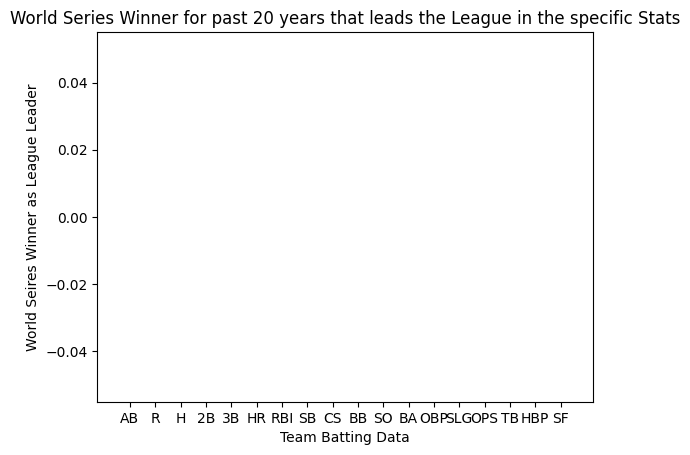

In [13]:
import matplotlib.pyplot as plt
list_names = ['AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'TB', 'HBP', 'SF']
list_lengths = [len(AB), len(R), len(H), len(two_B), len(three_B), len(HR), len(RBI), len(SB), len(CS), len(BB), len(SO), len(BA), len(OBP),
                len(SLG), len(OPS), len(TB), len(HBP), len(SF)]

plt.bar(list_names, list_lengths)

plt.xlabel('Team Batting Data')
plt.ylabel('World Seires Winner as League Leader')
plt.title('World Series Winner for past 20 years that leads the League in the specific Stats')

plt.show()

## Analysis/ML Plan:

The machine learning model we think is most appropriate for our project potentially might be multivariate regression ...

The machine learning model we think is most appropriate for our project is linear regression (which we are just now covering in class). We understand that linear regression can be utilized to predict a numeric variable y from one or more numeric variables x. We may investigate using linear regression with predictors such as the weather (temperature, humidity, wind speed, and precipitation) and gender (female, male) to see if we can predict a runner's finish time. We expect that some of these features will have an impact on the runner's finish time, though from the preliminary analysis it is possible that gender is the most important feature. It may be that some of the numeric features are related non-linearly, so we may also investigate some polynomial regression. We will make sure that we scale our numeric features before implementing the model, and will also make sure we cross validate while exploring different models. 

We may also explore models outside the scope of the course, though we expect regression to be the most appropriate for our questions of interest.
 